In [1]:
import pandas as pd
import numpy as np

In [2]:
df_compact = pd.read_csv('rpi_data_compact.csv')
df_compact.head(3)

,Unnamed: 0,Ping (ms),Download(Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25


In [3]:
df_compact.drop('Unnamed: 0', axis = 'columns', inplace = True)
df_compact.head()

,Ping (ms),Download(Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27


In [4]:
NaNs_in_df = df_compact.isnull()
print(type(NaNs_in_df))
NaNs_in_df.head()

<class 'pandas.core.frame.DataFrame'>


,Ping (ms),Download(Mbit/s),Upload (Mbit/s),Date,Time
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [5]:
NaNs_per_column = NaNs_in_df.sum()
print(type(NaNs_per_column))
NaNs_per_column.head()

<class 'pandas.core.series.Series'>


Ping (ms)           1
Download(Mbit/s)    1
Upload (Mbit/s)     7
Date                7
Time                7
dtype: int64

In [6]:
NaNs_total = NaNs_per_column.sum()
NaNs_total

23

In [7]:
df_compact.isnull().sum().sum()

23

In [8]:
NaNs_pct = np.round(df_compact.isnull().sum().sum()/float(len(df_compact)*len(df_compact.columns))*100, decimals = 4)
print('The DataFrame contains: {} NaNs, equals to {} of the measurements'.format(NaNs_total, NaNs_pct))

The DataFrame contains: 23 NaNs, equals to 0.6765 of the measurements


In [9]:
df_compact_clean = df_compact.dropna()

In [10]:
df_compact_clean.isnull().sum().sum()

0

In [11]:
df_compact

,Ping (ms),Download(Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27
...,...,...,...,...,...
675,retrieve,2016-11-24 19:18:03,NaN,NaN,NaN
676,retrieve,2016-11-24 19:18:06,NaN,NaN,NaN
677,retrieve,2016-11-24 19:18:10,NaN,NaN,NaN
678,retrieve,2016-11-24 19:18:13,NaN,NaN,NaN


In [12]:
df_compact_clean

,Ping (ms),Download(Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27
...,...,...,...,...,...
668,20.952,88.67,14.35,2016-11-24,19:15:32
669,19.397,84.86,14.35,2016-11-24,19:16:04
670,20.117,84.99,14.33,2016-11-24,19:16:34
671,17.995,86.21,6.88,2016-11-24,19:17:04


In [13]:
df_compact.dtypes

Ping (ms)            object
Download(Mbit/s)     object
Upload (Mbit/s)     float64
Date                 object
Time                 object
dtype: object

In [14]:
str_val = '10.56'
float_val = float(str_val)
print(str_val, type(str_val), float_val, type(float_val))

10.56 <class 'str'> 10.56 <class 'float'>


In [15]:
df_compact_clean['Ping (ms)_float'] = df_compact_clean['Ping (ms)'].apply(lambda x: float(x))
df_compact_clean['Download (Mbit/s)_float'] = df_compact_clean['Download(Mbit/s)'].apply(lambda x: float(x))
df_compact_clean.dtypes

C:\Users\emman\AppData\Local\Temp\ipykernel_9416\2270621811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compact_clean['Ping (ms)_float'] = df_compact_clean['Ping (ms)'].apply(lambda x: float(x))
C:\Users\emman\AppData\Local\Temp\ipykernel_9416\2270621811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compact_clean['Download (Mbit/s)_float'] = df_compact_clean['Download(Mbit/s)'].apply(lambda x: float(x))


Ping (ms)                   object
Download(Mbit/s)            object
Upload (Mbit/s)            float64
Date                        object
Time                        object
Ping (ms)_float            float64
Download (Mbit/s)_float    float64
dtype: object

In [16]:
df_compact_clean.drop(['Ping (ms)', 'Download(Mbit/s)'], axis = 'columns', inplace = True)
df_compact_clean.head()

C:\Users\emman\AppData\Local\Temp\ipykernel_9416\1324704529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compact_clean.drop(['Ping (ms)', 'Download(Mbit/s)'], axis = 'columns', inplace = True)


,Upload (Mbit/s),Date,Time,Ping (ms)_float,Download (Mbit/s)_float
0,14.31,2016-11-24,13:36:25,26.992,91.80
1,14.12,2016-11-24,13:36:55,24.532,88.19
2,14.11,2016-11-24,13:37:25,20.225,59.86
3,14.22,2016-11-24,13:37:57,19.332,91.81
4,14.08,2016-11-24,13:38:27,22.494,92.05


In [17]:
df_compact_clean.rename(columns = {'Ping (ms)_float': 'Ping (ms)', 'Download (Mbit/s)_float': 'Download (Mbit/s)'}, inplace = True)

C:\Users\emman\AppData\Local\Temp\ipykernel_9416\1336733440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compact_clean.rename(columns = {'Ping (ms)_float': 'Ping (ms)', 'Download (Mbit/s)_float': 'Download (Mbit/s)'}, inplace = True)


In [18]:
df_compact_clean.head()

,Upload (Mbit/s),Date,Time,Ping (ms),Download (Mbit/s)
0,14.31,2016-11-24,13:36:25,26.992,91.80
1,14.12,2016-11-24,13:36:55,24.532,88.19
2,14.11,2016-11-24,13:37:25,20.225,59.86
3,14.22,2016-11-24,13:37:57,19.332,91.81
4,14.08,2016-11-24,13:38:27,22.494,92.05


In [19]:
df_compact_clean = df_compact_clean.reindex(columns = ['Date', 'Time', 'Ping (ms)', 'Download (Mbit/s)', 'Upload (Mbit/s)']);
df_compact_clean

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,13:36:25,26.992,91.80,14.31
1,2016-11-24,13:36:55,24.532,88.19,14.12
2,2016-11-24,13:37:25,20.225,59.86,14.11
3,2016-11-24,13:37:57,19.332,91.81,14.22
4,2016-11-24,13:38:27,22.494,92.05,14.08
...,...,...,...,...,...
668,2016-11-24,19:15:32,20.952,88.67,14.35
669,2016-11-24,19:16:04,19.397,84.86,14.35
670,2016-11-24,19:16:34,20.117,84.99,14.33
671,2016-11-24,19:17:04,17.995,86.21,6.88


In [20]:
df_compact_clean.to_csv('rpi_data_processed.csv', index=False)
df_clean = df_compact_clean

In [21]:
means = df_compact_clean.mean()
stands = df_compact_clean.std()
stats_ping = (means['Ping (ms)'], stands['Ping (ms)'])
stats_download = (means['Download (Mbit/s)'], stands['Download (Mbit/s)'])
stats_upload = (means['Upload (Mbit/s)'], stands['Upload (Mbit/s)'])
print('Average ping time: {} ± {} ms'.format(*stats_ping))
print('Average download speed: {} ± {} Mbit/s'.format(*stats_download))
print('Average upload speed: {} ± {} Mbit/s'.format(*stats_upload))

Average ping time: 21.115451708766724 ± 5.161225495663228 ms
Average download speed: 90.44921248142644 ± 3.4656470318152284 Mbit/s
Average upload speed: 13.697607726597328 ± 1.0804708853031768 Mbit/s


C:\Users\emman\AppData\Local\Temp\ipykernel_9416\1277320916.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means = df_compact_clean.mean()
C:\Users\emman\AppData\Local\Temp\ipykernel_9416\1277320916.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stands = df_compact_clean.std()


In [22]:
means = df_clean.mean()
print(means)
means['Ping (ms)']

Ping (ms)            21.115452
Download (Mbit/s)    90.449212
Upload (Mbit/s)      13.697608
dtype: float64


C:\Users\emman\AppData\Local\Temp\ipykernel_9416\2237037508.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means = df_clean.mean()


21.115451708766724

In [23]:
df_clean['Date'][0]

'2016-11-24'

In [24]:
mins = df_clean.min()
maxs = df_clean.max()
mima_ping = (mins['Ping (ms)'], maxs['Ping (ms)'])
mima_download = (mins['Download (Mbit/s)'], maxs['Download (Mbit/s)'])
mima_upload = (mins['Upload (Mbit/s)'], maxs['Upload (Mbit/s)'])
print('Min ping time: {} ms. Max ping time: {} ms'.format(*mima_ping))
print('Min download speed: {} Mbit/s. Max download speed: {} Mbit/s'.format(*mima_download))
print('Min upload speed: {} Mbit/s. Max upload speed: {} Mbit/s'.format(*mima_upload))

Min ping time: 16.167 ms. Max ping time: 76.528 ms
Min download speed: 58.48 Mbit/s. Max download speed: 92.87 Mbit/s
Min upload speed: 6.21 Mbit/s. Max upload speed: 14.55 Mbit/s


In [25]:
df_clean.describe()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
count,673.000000,673.000000,673.000000
mean,21.115452,90.449212,13.697608
std,5.161225,3.465647,1.080471
min,16.167000,58.480000,6.210000
25%,19.115000,90.220000,13.640000
50%,20.322000,91.560000,13.980000
75%,21.843000,92.070000,14.180000
max,76.528000,92.870000,14.550000


In [26]:
argmin_ping = df_clean['Ping (ms)'].argmin()
argmax_ping = df_clean['Ping (ms)'].argmax()
argmin_download = df_clean['Download (Mbit/s)'].argmin()
argmax_download = df_clean['Download (Mbit/s)'].argmax()
argmin_upload = df_clean['Upload (Mbit/s)'].argmin()
argmax_upload = df_clean['Upload (Mbit/s)'].argmax()

In [27]:
df = pd.DataFrame({'field_1': [0,1], 'field_2': [0,2]})
df.head()

,field_1,field_2
0,0,0
1,1,2


In [28]:
df.iloc[1]['field_1']

1

In [29]:
print('Ping measure reached minimum on {} at {}'.format(df_clean.loc[argmin_ping, 'Date'], df_clean.loc[argmin_ping, 'Time']))
print('Download measure reached minimum on {} at {}'.format(df_clean.loc[argmin_download, 'Date'], df_clean.loc[argmin_download, 'Time']))
print('Upload measure reached minimum on {} at {}'.format(df_clean.loc[argmin_upload, 'Date'], df_clean.loc[argmin_upload, 'Time']))
print('Ping measure reached maximum on {} at {}'.format(df_clean.loc[argmax_ping, 'Date'], df_clean.loc[argmax_ping, 'Time']))
print('Download measure reached maximum on {} at {}'.format(df_clean.loc[argmax_download, 'Date'], df_clean.loc[argmax_download, 'Time']))
print('Upload measure reached maximum on {} at {}'.format(df_clean.loc[argmax_upload, 'Date'], df_clean.loc[argmax_upload, 'Time']))

Ping measure reached minimum on 2016-11-24 at 15:26:20
Download measure reached minimum on 2016-11-24 at 14:57:55
Upload measure reached minimum on 2016-11-24 at 17:31:47
Ping measure reached maximum on 2016-11-24 at 17:30:06
Download measure reached maximum on 2016-11-24 at 17:02:49
Upload measure reached maximum on 2016-11-24 at 18:02:15


In [30]:
df_corr = df_clean.corr()
df_corr

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
Ping (ms),1.000000,-0.045626,-0.463099
Download (Mbit/s),-0.045626,1.000000,0.083690
Upload (Mbit/s),-0.463099,0.083690,1.000000


In [31]:
corr = df_corr.values
print('Correlation coefficient between ping and download: {}'.format(corr[0, 1]))
print('Correlation coefficient between ping and upload: {}'.format(corr[0, 2]))
print('Correlation coefficient between upload and download: {}'.format(corr[2, 1]))

Correlation coefficient between ping and download: -0.04562611025837897
Correlation coefficient between ping and upload: -0.4630987138300179
Correlation coefficient between upload and download: 0.0836899693372496


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

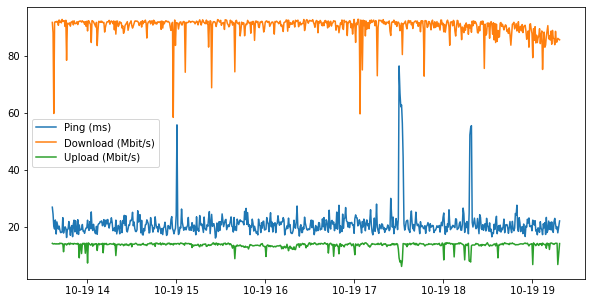

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))
t = pd.to_datetime(df_clean['Time'])
ax.plot(t, df_clean['Ping (ms)'], label='Ping (ms)')
ax.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')
ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')
ax.legend()
plt.show()

In [34]:
type(t[0])

pandas._libs.tslibs.timestamps.Timestamp

C:\Users\emman\AppData\Local\Temp\ipykernel_9416\464790764.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax.plot(t, df_clean['Ping (ms)'], '.', label='Ping (ms)', marker = '.')
C:\Users\emman\AppData\Local\Temp\ipykernel_9416\464790764.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax.plot(t, df_clean['Download (Mbit/s)'], '.', label='Download (Mbit/s)', marker = '.')
C:\Users\emman\AppData\Local\Temp\ipykernel_9416\464790764.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax.plot(t, df_clean['Upload (Mbit/s)'], '.', label='Upload (Mbit/s)', marker = '.')


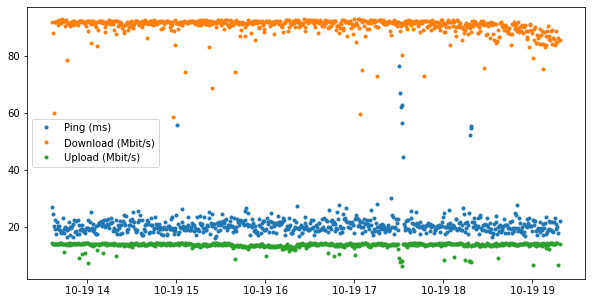

In [35]:
fig, ax = plt.subplots(figsize=(10, 5))
t = pd.to_datetime(df_clean['Time'])
ax.plot(t, df_clean['Ping (ms)'], '.', label='Ping (ms)', marker = '.')
ax.plot(t, df_clean['Download (Mbit/s)'], '.', label='Download (Mbit/s)', marker = '.')
ax.plot(t, df_clean['Upload (Mbit/s)'], '.', label='Upload (Mbit/s)', marker = '.')
ax.legend()
plt.show()

Text(0.5, 1.0, 'Medidor de Internet')

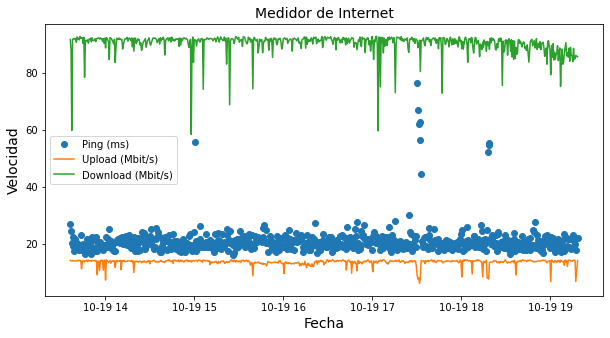

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))
t = pd.to_datetime(df_clean['Time'])
ax.plot(t, df_clean['Ping (ms)'], 'o', label='Ping (ms)')
ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')
ax.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')
ax.legend()
ax.set_xlabel("Fecha", fontsize=14)
ax.set_ylabel("Velocidad", fontsize=14)
ax.set_title("Medidor de Internet", fontsize=14)
#ax.tick_params(labelsize=14)

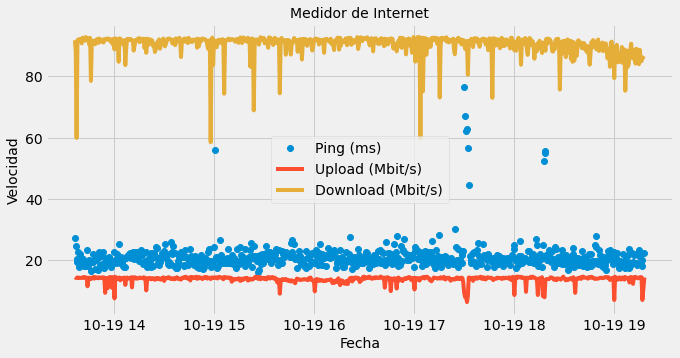

In [37]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize=(10, 5))
    t = pd.to_datetime(df_clean['Time'])
    ax.plot(t, df_clean['Ping (ms)'], 'o', label='Ping (ms)')
    ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')
    ax.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')
    ax.legend()
    ax.set_xlabel("Fecha", fontsize=14)
    ax.set_ylabel("Velocidad", fontsize=14)
    ax.set_title("Medidor de Internet", fontsize=14)

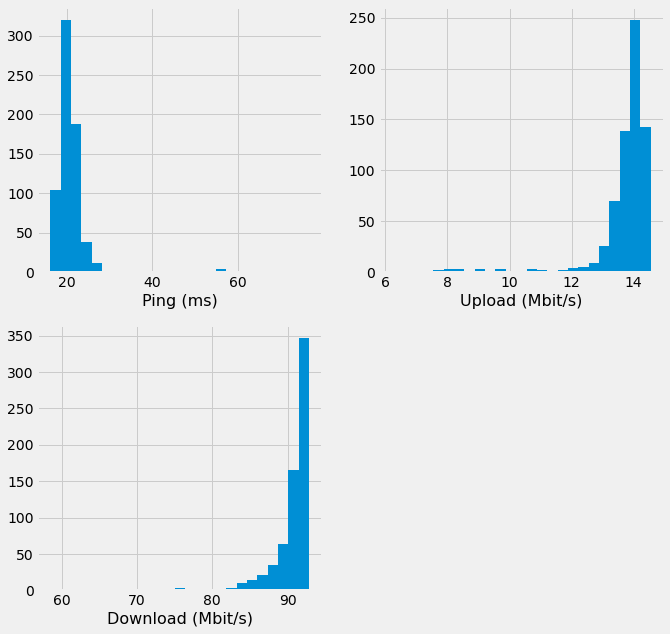

In [38]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    ax[0][0].hist(df_clean['Ping (ms)'], 25)
    ax[0][0].set_xlabel('Ping (ms)', fontsize=16)
    ax[0][0].tick_params(labelsize=14)
    ax[0][1].hist(df_clean['Upload (Mbit/s)'], 25)
    ax[0][1].set_xlabel('Upload (Mbit/s)', fontsize=16)
    ax[0][1].tick_params(labelsize=14)
    ax[1][0].hist(df_clean['Download (Mbit/s)'], 25)
    ax[1][0].set_xlabel('Download (Mbit/s)', fontsize=16)
    ax[1][0].tick_params(labelsize=14)
    ax[1][1].set_visible(False)